**Introduction to Least Squares**

- The least squares method finds an approximate solution to an overdetermined system $Ax = b$.
- The goal is to minimize the squared Euclidean norm $\|Ax - b\|^2$.
- If $b \in \text{im} A$, then $Ax = b$ has an exact solution.

**Normal Equations($L_2$ norm minimization):
best-fit solution for an overdetermined system**

theorem:
    The least squares solution to $Ax = b$ satisfies the normal equation:
    
$$    
    A^T A x = A^T b 
$$

provided that $A^T A$ is invertible, the solution is given by:

$$
     x^* = (A^T A)^{-1} A^T b
$$

- \( A \) is an \($ m \times n $\) matrix (typically \( m > n \)).
- \( b \) is an \($ m \times 1 $ \) vector.
- \( x \) is the \($ n \times 1 $\) unknown vector.


**Data fitting**

- Data fitting is a key application of least squares minimization.
- Given measurements $(t_i, y_i)$, we fit a function to approximate the data.
- A common model: $( y = \alpha + \beta t )$, where $\alpha
$ and $\beta$ are to be determined.
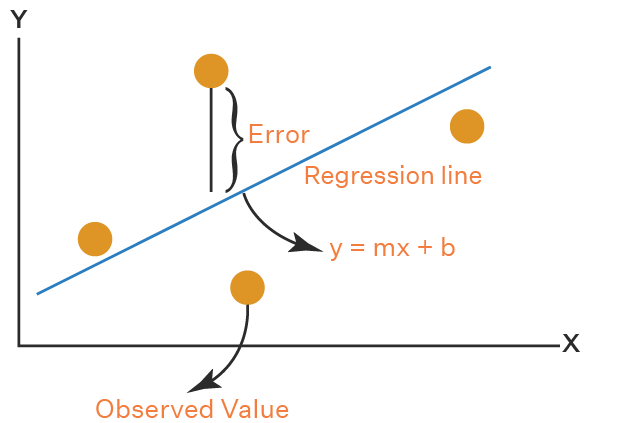
Figure: Fitting observations $y$ at points $x$ using line $y=mx+b$.

**Least Squares Formulation**

- Define the error vector:
$$
e_i = y_i - (\alpha + \beta t_i) 
$$
- In matrix form: 
$$
 e = y - A x, \quad A = \begin{bmatrix} 1 & t_1 \\ 1 & t_2 \\ \vdots & \vdots \\ 1 & t_m \end{bmatrix}, \quad x = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} 
$$
- The least squares problem minimizes  
$$
\| e \|^2 = \| Ax - y \|^2 .
$$

Minimizer: $x^* = (A^T A)^{-1} A^T y$.

In [2]:
import numpy as np

# ---------------------------------------------------------
# Example: Least Squares Solution Step-by-Step
# ---------------------------------------------------------

# Given matrices
A = np.array([
    [1,  2],
    [3, -1],
    [-1, 2],
    [1, -1],
    [2,  1]
], dtype=float)

b = np.array([[1], [0], [-1], [2], [2]], dtype=float)

# Step 1: Compute A^T A
AT = A.T
ATA = AT @ A
print("A^T A =\n", ATA)

# Step 2: Compute A^T b
ATb = AT @ b
print("\nA^T b =\n", ATb)

# Step 3: Solve (A^T A)x = A^T b
# Compute inverse of A^T A
ATA_inv = np.linalg.inv(ATA)
print("\n(A^T A)^(-1) =\n", ATA_inv)

# Compute least squares solution
x_star = ATA_inv @ ATb
print("\nLeast squares solution x* =\n", x_star)

# Extract values
x1, x2 = x_star.flatten()
print(f"\nα (x1) = {x1:.4f}, β (x2) = {x2:.4f}")

# Step 4: Compute Ax* (predicted values)
Ax_star = A @ x_star
print("\nA x* =\n", Ax_star)

# Step 5: Compute residual vector (error)
e = Ax_star - b
print("\nResidual vector e = Ax* - b =\n", e)

# Step 6: Compute least squares error (sum of squared residuals)
error = np.linalg.norm(e)**2
print("\nLeast Squares Error = ", round(error, 4))


A^T A =
 [[16. -2.]
 [-2. 11.]]

A^T b =
 [[8.]
 [0.]]

(A^T A)^(-1) =
 [[0.06395349 0.01162791]
 [0.01162791 0.09302326]]

Least squares solution x* =
 [[0.51162791]
 [0.09302326]]

α (x1) = 0.5116, β (x2) = 0.0930

A x* =
 [[ 0.69767442]
 [ 1.44186047]
 [-0.3255814 ]
 [ 0.41860465]
 [ 1.11627907]]

Residual vector e = Ax* - b =
 [[-0.30232558]
 [ 1.44186047]
 [ 0.6744186 ]
 [-1.58139535]
 [-0.88372093]]

Least Squares Error =  5.907


α (intercept): 2.1381
β (slope): 0.7514
Least Squares Error: 0.027


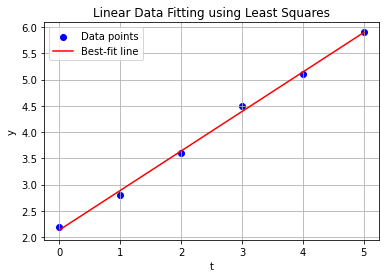

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Sample data points (t_i, y_i)
# ---------------------------------------------------------
# These represent measured values, for example time (t) and observations (y)
t = np.array([0, 1, 2, 3, 4, 5])        # Independent variable values
y = np.array([2.2, 2.8, 3.6, 4.5, 5.1, 5.9])  # Dependent variable (measurements)

# ---------------------------------------------------------
# 2. Build the matrix A and vector y
# ---------------------------------------------------------
# Model: y = α + βt  →  A = [1, t_i]
# Each row of A represents one data point: [1, t_i]
A = np.column_stack((np.ones(len(t)), t))  # Create matrix A with a column of ones and t values
y = y.reshape(-1, 1)                       # Convert y to a column vector

# ---------------------------------------------------------
# 3. Solve the normal equation for least squares
#    x* = (A^T A)^(-1) A^T y
# ---------------------------------------------------------
# This gives the best-fit parameters [α, β]
x_star = np.linalg.inv(A.T @ A) @ A.T @ y

alpha = x_star[0, 0]  # Intercept (α)
beta = x_star[1, 0]   # Slope (β)

print("α (intercept):", round(alpha, 4))
print("β (slope):", round(beta, 4))

# ---------------------------------------------------------
# 4. Compute the least squares error
# ---------------------------------------------------------
# Error = ||Ax* - y||^2
y_pred = A @ x_star                      # Predicted values
error = np.linalg.norm(y_pred - y)**2    # Squared Euclidean norm
print("Least Squares Error:", round(error, 4))

# ---------------------------------------------------------
# 5. Plot the data and the best-fit line
# ---------------------------------------------------------
plt.scatter(t, y, color='blue', label='Data points')  # Plot the original measurements
plt.plot(t, y_pred, color='red', label='Best-fit line')  # Plot the fitted line
plt.xlabel('t')
plt.ylabel('y')
plt.title('Linear Data Fitting using Least Squares')
plt.legend()
plt.grid(True)
plt.show()


**Weighted Least Squares**

- When measurements have different variances, use a weight matrix $C$.

- The weighted least squares solution satisfies:

$$
A^T C A x = A^T C b
$$
- The solution is given by:
$$
x^* = (A^T C A)^{-1} A^T C b
$$

It is useful when data points have varying reliability or importance.


Estimated α (intercept): 2.1335
Estimated β (slope): 0.7479
Weighted Least Squares Error: 0.0305


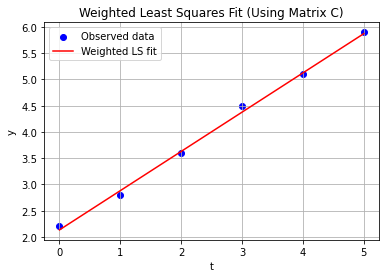

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Weighted Least Squares (Class Definition)
# Equation: (Aᵀ C A) x = Aᵀ C b
# Solution:  x* = (Aᵀ C A)⁻¹ Aᵀ C b
# ---------------------------------------------------------

# --- Step 1: Define data ---
# Suppose we have measurements (t_i, y_i)
t = np.array([0, 1, 2, 3, 4, 5])
b = np.array([2.2, 2.8, 3.6, 4.5, 5.1, 5.9])  # measured outputs (like y_i)

# --- Step 2: Build matrix A for the model y = α + βt ---
A = np.vstack([np.ones(len(t)), t]).T

# --- Step 3: Define weight matrix C ---
# When data points have different reliability or importance
# Larger C[i,i] → higher weight (more reliable point)
C = np.diag([1, 1, 2, 1, 3, 1])  # Example: point 3 and 5 are more reliable

# --- Step 4: Solve for x* = [α, β]ᵀ ---
x_star = np.linalg.inv(A.T @ C @ A) @ (A.T @ C @ b)

# Extract α and β
alpha, beta = x_star

# --- Step 5: Compute fitted values ---
y_fit = A @ x_star

# --- Step 6: Compute the weighted least squares error ---
# e = ||Ax - b||²_C = (Ax - b)ᵀ C (Ax - b)
error = (y_fit - b).T @ C @ (y_fit - b)

# --- Step 7: Display results ---
print(f"Estimated α (intercept): {alpha:.4f}")
print(f"Estimated β (slope): {beta:.4f}")
print(f"Weighted Least Squares Error: {error:.4f}")

# --- Step 8: Plot data and fitted line ---
plt.scatter(t, b, color='blue', label='Observed data')
plt.plot(t, y_fit, color='red', label='Weighted LS fit')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Weighted Least Squares Fit (Using Matrix C)')
plt.legend()
plt.grid(True)
plt.show()


**Conclusion**

- Least squares minimizes the error when an exact solution does not exist.
- It provides a best-fit approximation.
- Applications include regression, signal processing, and optimization.
